In [1]:
# 线性回归

In [2]:
import torch

a = torch.ones(1000)
b = torch.ones(1000)

In [3]:
from time import time

start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
time() - start

0.007001161575317383

In [4]:
start = time()
d = a + b
time() - start

0.0010027885437011719

In [5]:
a = torch.ones(3)
b = 10
a + b

tensor([11., 11., 11.])

In [6]:
import numpy as np

a = np.ones(1000)
b = np.ones(1000)
start = time()
d = a + b
time() - start

0.0

In [7]:
import matplotlib.pyplot as plt
import random

In [8]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

In [9]:
features[0], labels[0]

(tensor([-0.9053, -1.6199]), tensor(7.9210))

E:\python_tools\anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  


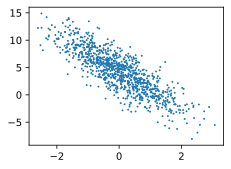

In [10]:
from IPython import display


def use_svg_display():
    # 用矢量图表示
    display.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    #  设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize


set_figsize()
# 加分号只显示图
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [11]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 样本的读取顺序是随机的
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        # 最后一次可能不足一个batch
        j = torch.LongTensor(indices[i:min(i + batch_size, num_examples)])
        # index_select 函数根据索引返回对应元素
        yield features.index_select(0, j), labels.index_select(0, j)

In [12]:
batch_size = 10
for x, y in data_iter(batch_size, features, labels):
    print(x, y)
    break

tensor([[-0.8608, -0.4538],
        [ 0.7771,  1.5408],
        [-0.9123, -0.3185],
        [-1.6210, -0.8930],
        [-0.4322,  0.3145],
        [-0.2637,  0.8170],
        [-0.6603,  0.8035],
        [-0.3466, -0.0455],
        [-0.5955, -0.6360],
        [ 0.4080,  0.1217]]) tensor([4.0234, 0.5035, 3.4468, 3.9852, 2.2633, 0.8947, 0.1502, 3.6624, 5.1670,
        4.5903])


In [13]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [14]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [15]:
def linreg(x, w, b):
    return torch.mm(x, w) + b

In [16]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [17]:
def sgd(parms, lr, batch_size):
    for param in parms:
        param.data -= lr * param.grad / batch_size

In [18]:
lr = .03
num_epochs = 3
net = linreg
loss = squared_loss
# 训练模型一共需要num_epochs个迭代周期
for epoch in range(num_epochs):
    # 在每一个迭代周期中，会使用 训练集中所有样本一次（假设样本数能够被批量大小整除）
    # x和y分别是小批量样本的特征和标签
    for x, y in data_iter(batch_size, features, labels):
        # l是有关小批量x和y的损失
        l = loss(net(x, w, b), y).sum()
        # 小批量损失对模型参数求梯度
        l.backward()
        # 使用小批量随机梯度下降迭代参数模型
        sgd([w, b], lr, batch_size)
        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print(f'Epoch: {epoch + 1}', f'Loss: {train_l.mean().item():.6f}')

Epoch: 1 Loss: 0.039854
Epoch: 2 Loss: 0.000155
Epoch: 3 Loss: 0.000053


In [19]:
 true_w, w

([2, -3.4],
 tensor([[ 1.9998],
         [-3.3990]], requires_grad=True))

In [20]:
true_b, b

(4.2, tensor([4.1998], requires_grad=True))

In [21]:
# 线性回归的简洁实现   
#
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(
    np.random.normal(0, 1, (num_examples, num_inputs)),
    dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

In [22]:
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
date_iter = Data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [23]:
for x, y in date_iter:
    print(x, y)
    break

tensor([[ 1.3967, -0.7566],
        [-0.8524,  0.6102],
        [ 0.3634,  0.2520],
        [-1.1488, -0.3261],
        [ 1.5374,  0.7307],
        [-1.2047, -0.6454],
        [-1.5210,  1.1235],
        [ 1.6603,  0.7931],
        [ 0.1530, -0.0675],
        [ 1.1234,  0.3412]]) tensor([ 9.5582,  0.3994,  4.0524,  3.0171,  4.7791,  3.9706, -2.6625,  4.8216,
         4.7428,  5.2763])


In [24]:
from torch import nn


class LinerNet(nn.Module):
    def __init__(self, n_feature):
        super(LinerNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
        # forward 定义前向传播

    def forward(self, x):
        y = self.linear(x)
        return y


net = LinerNet(num_inputs)
# 打印网络结构
print(net)

LinerNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [25]:
net = nn.Sequential()
net.add_module('linear1', nn.Linear(num_inputs, 1))
print(net)

Sequential(
  (linear1): Linear(in_features=2, out_features=1, bias=True)
)


In [26]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 0.4778, -0.3117]], requires_grad=True)
Parameter containing:
tensor([-0.0134], requires_grad=True)


In [28]:
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [29]:
loss = nn.MSELoss()

In [31]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.03
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [41]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in date_iter:
        # 前向传播
        output = net(X)
        # 计算损失
        l = loss(output, y.view(-1, 1))
        # 梯度清零
        optimizer.zero_grad()
        # 反向传播
        l.backward()
        # 更新参数
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))


epoch 1, loss: 0.000144
epoch 2, loss: 0.000060
epoch 3, loss: 0.000028


In [42]:
dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 2.0005, -3.4004]], requires_grad=True)
4.2 Parameter containing:
tensor([4.2001], requires_grad=True)
